In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
import tensorflow as tf
from tensorflow_probability.python.distributions import Chi2

In [60]:
nz = 100
batch_size = 10000

In [61]:
chsq = Chi2(df=1/batch_size)

In [62]:
from sklearn.datasets import make_moons, make_blobs

In [63]:
z,_ = make_blobs(centers = 10, n_samples = batch_size, n_features = nz)
z = tf.convert_to_tensor(z, dtype=tf.float32)

In [64]:
#z = tf.random.uniform(shape=(batch_size, nz))
#z.shape

In [65]:
ip = chsq.sample((z.shape[0], z.shape[0]))
ip = ip / tf.reduce_sum(ip, axis=0)
zi = tf.transpose(tf.tensordot(tf.transpose(z), ip, axes=1))

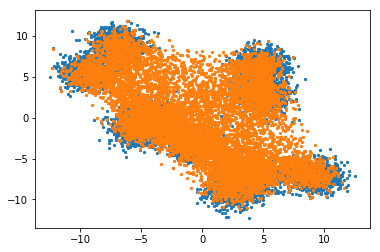

In [66]:
plt.scatter(z.numpy()[:,0], z.numpy()[:,1], alpha = 1, s=5)
plt.scatter(zi.numpy()[:,0], zi.numpy()[:,1], alpha = 1, s=5)

In [67]:
import umap


In [68]:
trans = umap.UMAP().fit(np.concatenate([zi.numpy(), z.numpy()], axis = 0))

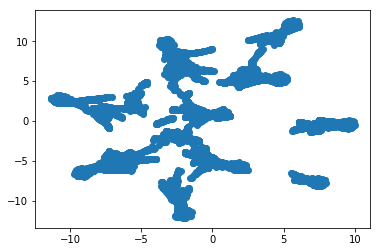

In [69]:
plt.scatter(trans.embedding_[:,0], trans.embedding_[:,1])

In [72]:
test_embedding = trans.transform(zi.numpy())


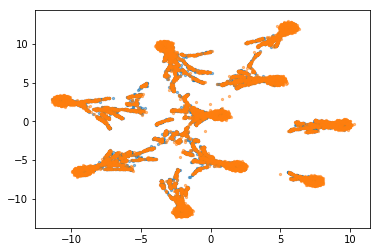

In [73]:
plt.scatter(trans.embedding_[:,0], trans.embedding_[:,1], alpha = 0.5, s=5)
plt.scatter(test_embedding[:,0], test_embedding[:,1], alpha = 0.5, s=5)
